<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#importing required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

spending  advance_payments  ...  min_payment_amt  max_spent_in_single_shopping
0     19.94             16.92  ...            3.252                         6.550
1     15.99             14.89  ...            3.336                         5.144
2     18.95             16.42  ...            3.368                         6.148
3     10.83             12.96  ...            5.182                         5.185
4     17.99             15.86  ...            2.068                         5.837

[5 rows x 7 columns]

**1 Read the data and do exploratory data analysis. Describe the data briefly.**

In [ ]:
report = ProfileReport(df, explorative= True)
report

In [ ]:
#report.to_file(output_file= 'credit_card.html')

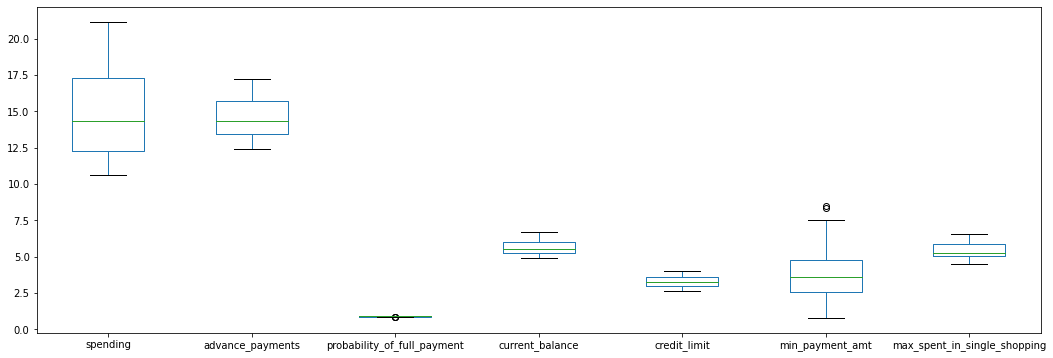

In [ ]:
df.boxplot(figsize= (18,6), grid= False)

**EDA observations:** 

1. dataset contains 210 rows and 7 columns 
2. No missing values or duplicate rows 
3. All the variables are continous type
4. from Histogram & box plot: 
   * all the variables except probability_of_full_payment are rightly skewed and multi modal 
   * Only the min_payment_amt variable contains outliers
5. from Correlation plot: 
   * There is a positive correlation among spending, advance_payments, probabilility_of_full_payment, credit_limit, and max_spent_in_single_shopping variables.
   * min_payment_amt (customers paying min card due amount) is negatively correlated with all the other variables expect max_spent_in_single_shopping no correlation.



**2  Do you think scaling is necessary for clustering in this case? Justify**


Yes, since we have variables with different measurement units (0-1, 100s, 1000s, 10000s) and scales which needs to transformed into a common space. 

K-means is a distance based algorithm and all such algorithm are effected by the scale of variables. 

if not scaled, the model will give higher weightage which have higher magnitude e.g. Spending, advance payments in this case. 






**3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

In [ ]:
#scaling the data 
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df_scaled.head()

spending  advance_payments  ...  min_payment_amt  max_spent_in_single_shopping
0  1.754355          1.811968  ...        -0.298806                      2.328998
1  0.393582          0.253840  ...        -0.242805                     -0.538582
2  1.413300          1.428192  ...        -0.221471                      1.509107
3 -1.384034         -1.227533  ...         0.987884                     -0.454961
4  1.082581          0.998364  ...        -1.088154                      0.874813

[5 rows x 7 columns]

In [ ]:
Z = linkage(df_scaled, method = 'average', metric='euclidean')

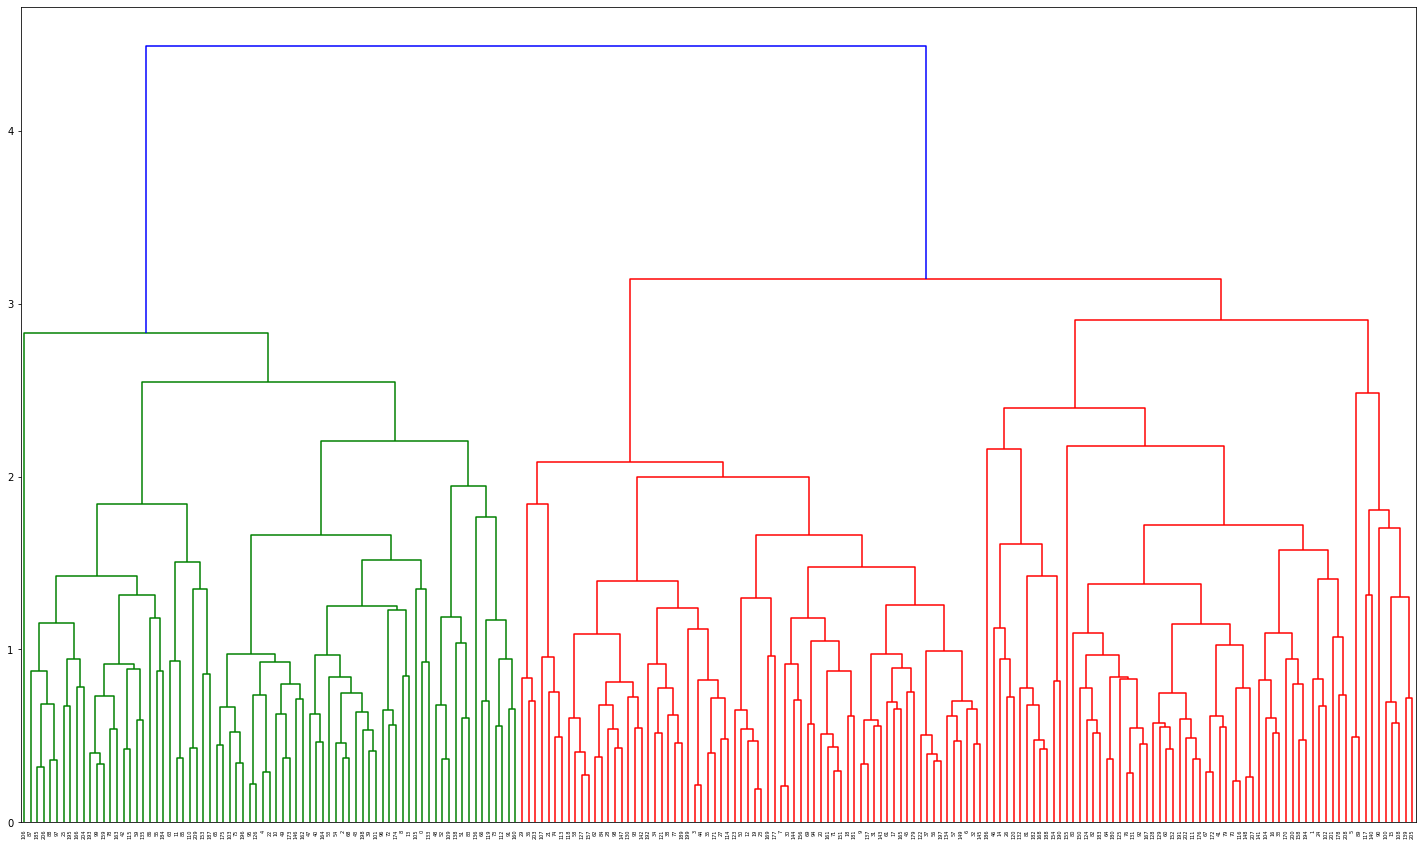

In [ ]:
#Plotting the dendogram 
plt.figure(figsize=(25, 15))
dendrogram(Z)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3 and cut the dendrogram:

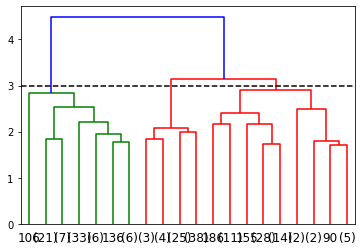

In [ ]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20 # show only the last p merged clusters
)
plt.axhline(y=3, color='black', linestyle='--')
plt.show()

We have three clusters as this line cuts the dendrogram at three points. Let’s now apply hierarchical clustering for 3 clusters:

In [ ]:
#extracting clusters
clusters = fcluster(Z, 3, criterion='maxclust')
set(clusters) #gives us the unique values

{1, 2, 3}

In [ ]:
#adding clusters the original dataset
df['hclust'] = clusters
df.head()

spending  advance_payments  ...  max_spent_in_single_shopping  hclust
0     19.94             16.92  ...                         6.550       1
1     15.99             14.89  ...                         5.144       3
2     18.95             16.42  ...                         6.148       1
3     10.83             12.96  ...                         5.185       2
4     17.99             15.86  ...                         5.837       1

[5 rows x 8 columns]

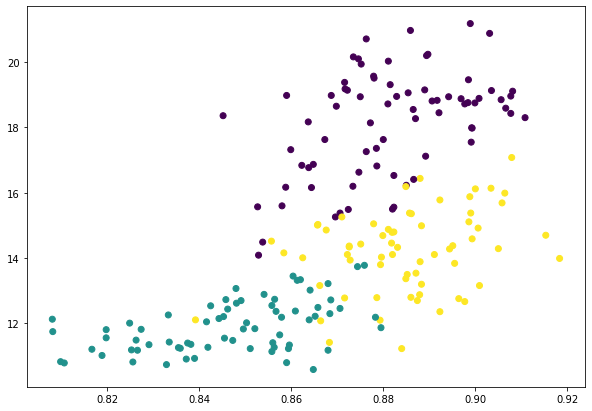

In [ ]:
#visualizing clusters
plt.figure(figsize=(10, 7))  
plt.scatter(y= df['spending'],x= df['probability_of_full_payment'],c = clusters)

*We can clearly see three clusters here, with each cluster represented by different colour*

**4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.**

In [ ]:
#Defining an empty list to begin the process of automating the calculation of 'inertia'.
wss = []

In [ ]:
for i in range(2,11): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i,random_state=1) #we are defining the number of clusters which is the same as 'i'
    KM.fit(df_scaled) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss.append(KM.inertia_) # we are adding all the values of 'inertia' into the empty list called wss
    
#In short, we are calculating the value of 'inertia' in every step and storing the same in 'wss'

In [ ]:
# The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(2,11):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 659.1717544870407
The WSS value for 3 clusters is 430.65897315130053
The WSS value for 4 clusters is 371.38509060801096
The WSS value for 5 clusters is 327.2127816566136
The WSS value for 6 clusters is 289.315995389595
The WSS value for 7 clusters is 262.98186570162255
The WSS value for 8 clusters is 241.81894656086018
The WSS value for 9 clusters is 223.9125422100272
The WSS value for 10 clusters is 206.39612184786688


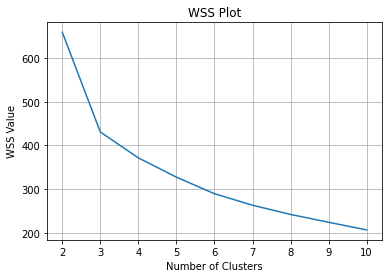

In [ ]:
plt.plot(range(2,11), wss)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

Here,the optimum clusters is coming out to be 3 as a sharp elbow is being formed at the $3^{rd}$ cluster.

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_
set(labels)

{0, 1, 2}

In [ ]:
silhouette_score(df_scaled, labels)

0.4007270552751299

Positive silhouette score indicates record/customer is well matched to their own cluster and poorly matched to neighboring clusters.

In [ ]:
silhouette_samples(df_scaled, labels)

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [ ]:
silhouette_samples(df_scaled, labels).min()

0.002713089347678533

This indicates no record or customer sample is incorrectly mapped to any cluster. 

In [ ]:
df["Clus_kmeans"] = labels
df.head()

spending  advance_payments  ...  hclust  Clus_kmeans
0     19.94             16.92  ...       1            2
1     15.99             14.89  ...       3            0
2     18.95             16.42  ...       1            2
3     10.83             12.96  ...       2            1
4     17.99             15.86  ...       1            2

[5 rows x 9 columns]

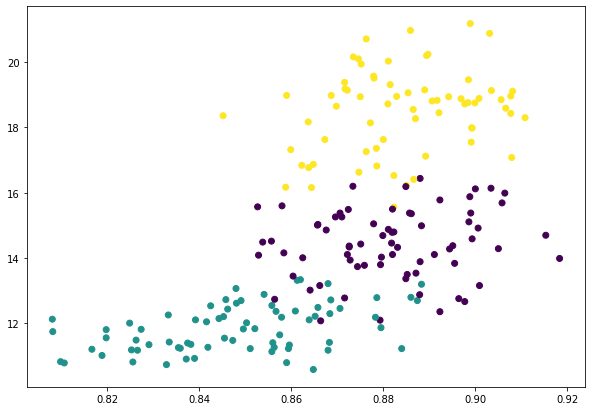

In [ ]:
#visualizing clusters
plt.figure(figsize=(10, 7))  
plt.scatter(y= df['spending'],x= df['probability_of_full_payment'],c = labels)

*We can clearly see three clusters here, with each cluster represented by different colour*

In [ ]:
#df.to_csv('Clustering.csv')

**5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**

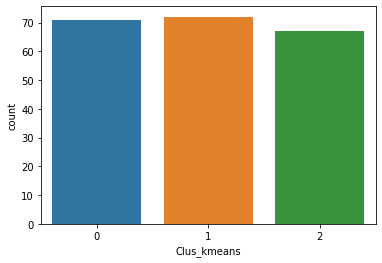

In [ ]:
sns.countplot(x = df['Clus_kmeans'], data = df)

In [ ]:
#Creating different datasets for clusters and classifying them into High, Medium and Low spend category customers. 
Medium = df.query('Clus_kmeans == 0')
Low = df.query('Clus_kmeans == 1')
High = df.query('Clus_kmeans == 2')

In [ ]:
High.iloc[:, :-2].describe()

spending  ...  max_spent_in_single_shopping
count  67.000000  ...                     67.000000
mean   18.495373  ...                      6.041701
std     1.277122  ...                      0.229566
min    15.560000  ...                      5.484000
25%    17.590000  ...                      5.879000
50%    18.750000  ...                      6.009000
75%    19.145000  ...                      6.192500
max    21.180000  ...                      6.550000

[8 rows x 7 columns]

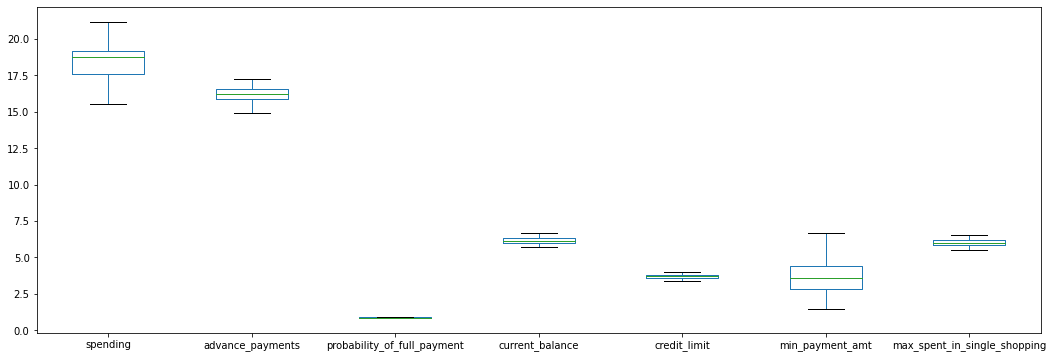

In [ ]:
High.iloc[:, :-2].boxplot(figsize= (18,6), grid= False)

In [ ]:
Medium.iloc[:, :-2].describe()

spending  ...  max_spent_in_single_shopping
count  71.000000  ...                     71.000000
mean   14.437887  ...                      5.120803
std     1.056513  ...                      0.269558
min    12.080000  ...                      4.605000
25%    13.820000  ...                      4.958500
50%    14.430000  ...                      5.132000
75%    15.260000  ...                      5.263500
max    16.440000  ...                      5.879000

[8 rows x 7 columns]

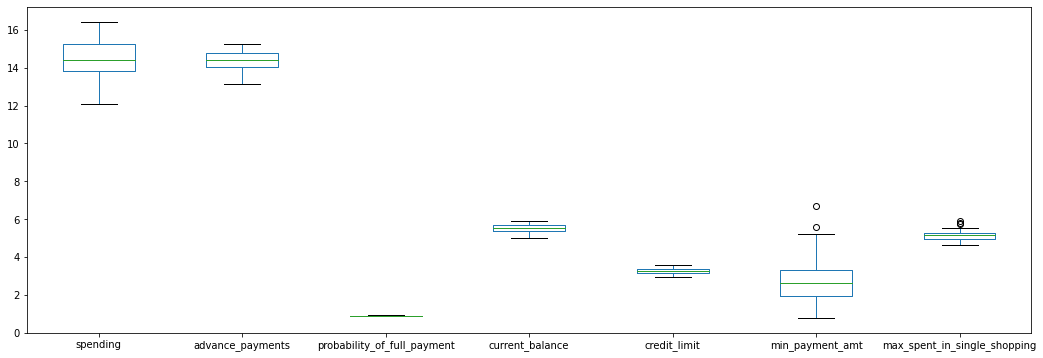

In [ ]:
Medium.iloc[:, :-2].boxplot(figsize= (18,6), grid= False)

In [ ]:
Low.iloc[:, :-2].describe()

spending  ...  max_spent_in_single_shopping
count  72.000000  ...                     72.000000
mean   11.856944  ...                      5.101722
std     0.714801  ...                      0.184012
min    10.590000  ...                      4.519000
25%    11.255000  ...                      5.001000
50%    11.825000  ...                      5.089000
75%    12.395000  ...                      5.223500
max    13.340000  ...                      5.491000

[8 rows x 7 columns]

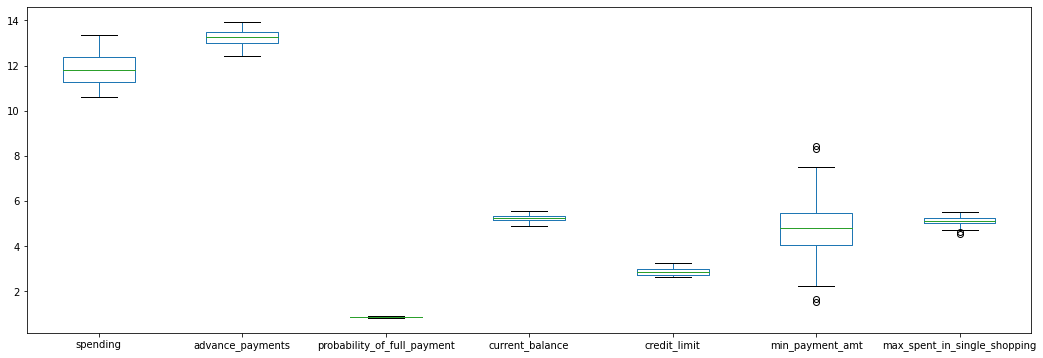

In [ ]:
Low.iloc[:, :-2].boxplot(figsize= (18,6), grid= False)

### Cluster Analysis: 

1. Medium and Low spend category customers spent similarly in single shopping. 

2. There's a high standard deviation in spending for High Spend customer criteria. 

3. Probability of full payment is simialar for both High and Medium spend category customers. 

4. There are few outliers in min_payment_amt and max_spent_in_single_shopping criteria in Medium and Low spend category customers 

5. We can see clear distinction between all the three customer categories variables (mean, std, min, max, quartiles) 

###Recomendations: 

**Low Spending Customers**: 
1. Introducting cash back deals/EMI offers from variety of Merchants

2. Sending gift vouchers from free promotion offers 

3. Waiving of annual or monthly credit card fees if they spend more than a pre-defined threshold

4. No transaction fees for online spend (Internet banking, transfers etc.)

**Medium Spend Customers** 

1. Introducing cash back offers and special deals with selected merchants. 

2. Increasing credit card limit

3. Option to upgrade to premium credit card if they spend more than a threshold limit 

4. Reward points based on transaction amount (e.g: 1 point for 100rs spent, which can be used in exclusive deals) 


**High Spend Customer**

1. Increasing credit card limit 

2. Offering add-on credit cards to customers family members 

3. Offering loyalty programs by giving them incentives to use credit card

4. Offering seasonal credit card campaigns (summer vacation, holiday season etc.) 

